## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Business Understanding
# Data Understanding
# Data Preparation
# Modeling
# Regression Results
# Code Quality

In [2]:
# Business Understanding

In [3]:
# Data Understanding

In [1]:
# Datasets: KC House dataset
!ls data/

column_names.md  kc_house_data.csv


In [2]:
# Inspect content for the columns
!cat data/column_names.md

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In [73]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [4]:
# Load the dataset
kc_house_data = pd.read_csv('./data/kc_house_data.csv', encoding='utf8')
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Check last 5 values
kc_house_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [6]:
# Check a random sample of the data
kc_house_data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3880,7740100015,2/6/2015,440000.0,3,1.75,2840,16851,1.0,NO,GOOD,...,8 Good,1600,1240.0,1950,0.0,98155,47.7458,-122.287,2650,11063
3278,8964800025,2/26/2015,1970000.0,5,3.75,3940,13738,1.5,NO,GOOD,...,9 Better,3940,0.0,1951,0.0,98004,47.6203,-122.212,2370,13320
12220,2887700875,7/23/2014,344000.0,2,1.00,1060,3325,1.5,NO,NONE,...,6 Low Average,770,290.0,1932,0.0,98115,47.6896,-122.307,1820,4275
15623,1193000380,3/30/2015,740000.0,4,2.25,2230,6000,1.5,NaN,AVERAGE,...,8 Good,1810,420.0,1928,0.0,98199,47.6464,-122.391,2840,6000
20631,3869900136,12/19/2014,539950.0,3,2.25,1670,1596,3.0,NaN,NONE,...,8 Good,1670,0.0,2014,0.0,98136,47.5402,-122.387,1640,1310
9776,5451200520,6/12/2014,850000.0,4,2.25,2130,11843,2.0,NO,NONE,...,9 Better,2130,0.0,1972,0.0,98040,47.5358,-122.225,2380,11643
19907,475000187,5/1/2015,452950.0,3,2.50,1150,1194,2.0,NO,NONE,...,8 Good,1020,130.0,2006,0.0,98107,47.6684,-122.365,1450,1714
15608,9274202005,7/2/2014,723000.0,4,2.25,2430,4748,1.5,NO,NONE,...,8 Good,1630,800.0,1928,0.0,98116,47.5904,-122.389,2430,4748
9347,66000265,8/7/2014,370000.0,2,1.00,820,6550,1.0,NO,NONE,...,7 Average,820,0.0,1949,2012.0,98126,47.5478,-122.381,1640,6550
4505,3362400615,8/20/2014,400000.0,3,1.00,1350,3090,1.5,NO,NONE,...,6 Low Average,1350,0.0,1914,0.0,98103,47.6820,-122.348,1350,3090


In [7]:
# Check data types and column information
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Investigate unique values in each column
Let's investigate unique values in the columns to find any uncaught null values or incorrect data types

In [8]:
# Date column
kc_house_data['date'].value_counts()

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
11/30/2014      1
5/24/2015       1
8/3/2014        1
11/2/2014       1
5/27/2015       1
Name: date, Length: 372, dtype: int64

In [9]:
# Price column
kc_house_data['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [10]:
# Bedrooms column
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
# Bathrooms column
kc_house_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [12]:
# Sqft_living column
kc_house_data['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [13]:
# Sqft_lot column
kc_house_data['sqft_lot'].value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [14]:
# Floors column
kc_house_data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [15]:
# Waterfront column
kc_house_data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [16]:
# View column
kc_house_data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [17]:
# condition column
kc_house_data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [18]:
# Grade column
kc_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [19]:
# Sqft_above column
kc_house_data['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [21]:
# Sqft_basement column
kc_house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1008.0        1
2130.0        1
20.0          1
65.0          1
704.0         1
Name: sqft_basement, Length: 304, dtype: int64

There is a **?** on **454** records in sqft_basement meaning they are null values. The datatype of the column values is object thus needs to be converted to float measurements after replacing the null values

In [22]:
# Sqft_living column
kc_house_data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [23]:
# Yr_renovated column
kc_house_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
# Zipcode column
kc_house_data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [25]:
# Latitude column
kc_house_data['lat'].value_counts()

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

In [26]:
# Longitude column
kc_house_data['long'].value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

In [27]:
# sqft_living15 column
kc_house_data['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [28]:
# sqft_lot15 column
kc_house_data['sqft_lot15'].value_counts()

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

## Data Cleaning

In order to carry out further investigation, we need to convert the **?** in sqft_basement to an empty value then correct the data type.

In [29]:
# Replace ? with nan
kc_house_data['sqft_basement'].replace(to_replace=['?'], value=[np.nan], inplace=True)
kc_house_data['sqft_basement'].isna().sum()

454

In [32]:
# Find and count null entries
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [33]:
# Get percentage of null values
def getNullValues(dataFrame):
    """Calculates the percentage of data that is missing in each column"""
    percentage_of_null_values = 0
    for col in dataFrame.columns:
        percentage_of_null_values = dataFrame[col].isna().sum() / dataFrame.shape[0] * 100
        print(f"{round(percentage_of_null_values, 2)}% - {col}")
getNullValues(kc_house_data)

0.0% - id
0.0% - date
0.0% - price
0.0% - bedrooms
0.0% - bathrooms
0.0% - sqft_living
0.0% - sqft_lot
0.0% - floors
11.0% - waterfront
0.29% - view
0.0% - condition
0.0% - grade
0.0% - sqft_above
2.1% - sqft_basement
0.0% - yr_built
17.79% - yr_renovated
0.0% - zipcode
0.0% - lat
0.0% - long
0.0% - sqft_living15
0.0% - sqft_lot15


In [36]:
# Convert to float
kc_house_data['sqft_basement'] = kc_house_data['sqft_basement'].astype(np.int64).fillna(0)
kc_house_data.info()

ValueError: invalid literal for int() with base 10: '0.0'

In [37]:
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [119]:
# Get descriptive statistics (mean, min-max, std etc.)
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [120]:
kc_house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,-0.004359,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.321108,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_basement,-0.004359,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.071190,0.073271,0.109853,-0.142369,0.199288,0.015885
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777


<AxesSubplot:>

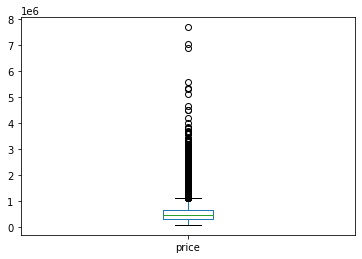

In [15]:
kc_house_data['price'].plot(kind='box')

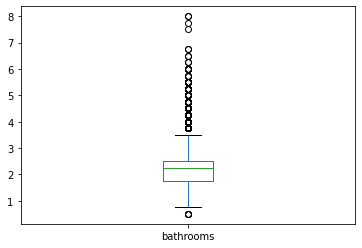

In [16]:
kc_house_data['bathrooms'].plot(kind='box');

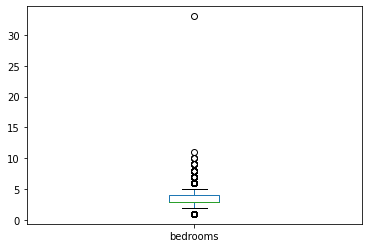

In [17]:
kc_house_data['bedrooms'].plot(kind='box');

In [18]:
kc_house_data.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The minimum price for a house is **\$78,000** and the maximum is **\$7,700,000**. The mean price of a house is **\$540,296.6** with a standard deviation of **\$367,368.1**

In [19]:
kc_house_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [20]:
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [21]:
kc_house_data.loc[kc_house_data['bedrooms'] == 33, :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [22]:
kc_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [23]:
kc_house_data['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

In [24]:
kc_house_data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

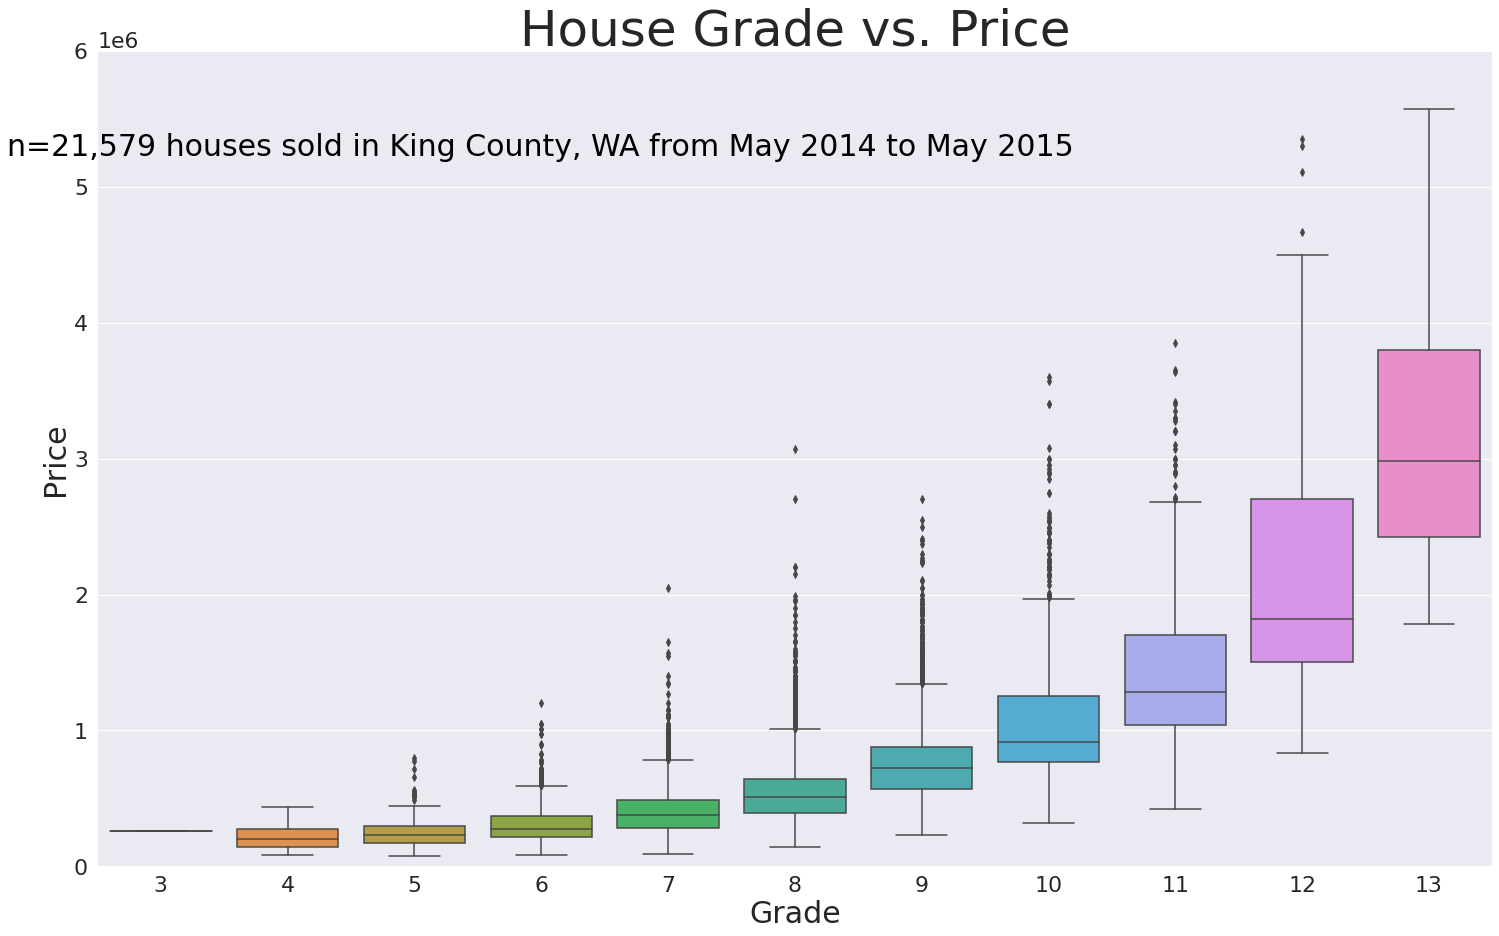

In [25]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="grade", y="price", data=kc_house_data)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);
# plt.savefig('./visualizations/grade.png')

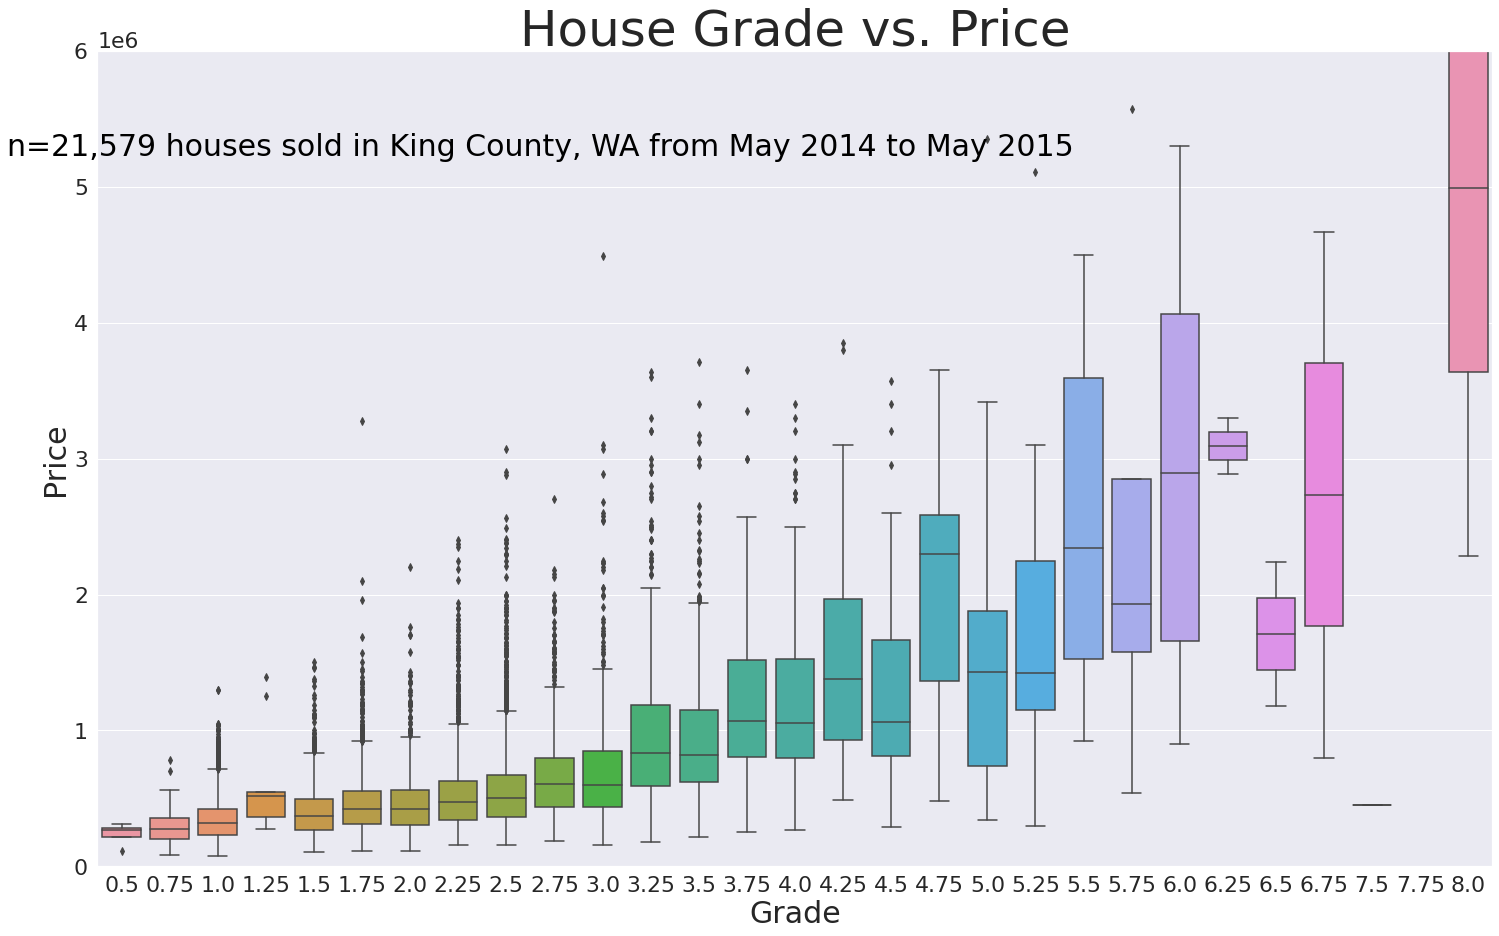

In [26]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="bathrooms", y="price", data=kc_house_data)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);
# plt.savefig('./visualizations/grade.png')

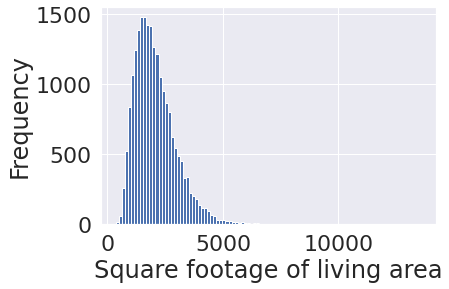

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel('Square footage of living area')
ax.set_ylabel('Frequency')
ax.hist(kc_house_data['sqft_living'], bins=100);
# kc_house_data['sqft_living'].hist()

In [28]:
print("Skewness:", kc_house_data['sqft_living'].skew())
print("Kurtosis:", kc_house_data['sqft_living'].kurt())

Skewness: 1.473215455425834
Kurtosis: 5.252101950846816


In [29]:
kc_house_data['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [30]:
mean = kc_house_data['sqft_living'].mean()
mean

2080.3218502569803

In [31]:
std = kc_house_data['sqft_living'].std()
std

918.1061250800805

In [32]:
std_1 = mean + std
std_1m = mean - std
std_15 = mean + (1.5*std)
std_15m = mean - (1.5*std)

In [33]:
df = kc_house_data.loc[(kc_house_data['sqft_living']<std_15) & (kc_house_data['sqft_living']>std_15m)]

Skewness: 0.34744362219781993
Kurtosis: -0.7020749344943029


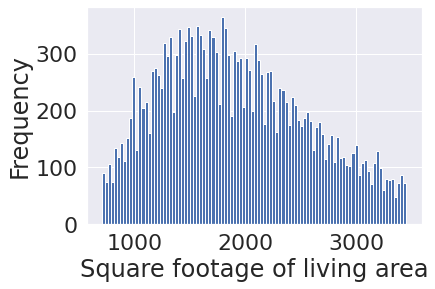

In [34]:
fig, ax = plt.subplots()
ax.set_xlabel('Square footage of living area')
ax.set_ylabel('Frequency')
ax.hist(df['sqft_living'], bins=100);
print("Skewness:", df['sqft_living'].skew())
print("Kurtosis:", df['sqft_living'].kurt())

In [35]:
kc_house_data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)

In [36]:
kc_house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
248.0         1
2610.0        1
2810.0        1
704.0         1
2050.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [37]:
kc_house_data['sqft_basement'].replace(to_replace=['?'], value=[0], inplace=True)

In [38]:
kc_house_data['sqft_basement'].value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
283.0         1
2050.0        1
2490.0        1
2500.0        1
1798.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [39]:
kc_house_data['sqft_basement'] = kc_house_data['sqft_basement'].astype('float')

In [40]:
kc_house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.008188,-0.010799,-0.004359,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.667951,0.605368,0.321108,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.356563,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.665838,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.762779,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.114731,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.458794,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.087383,0.075463,0.088213,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,1.000000,0.756073,0.165843,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.075463,0.756073,1.000000,-0.051175,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077


In [41]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,NONE,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,NONE,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,NONE,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,NONE,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:ylabel='Frequency'>

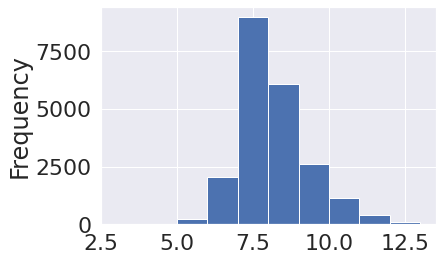

In [42]:
kc_house_data['grade'].plot(kind='hist')

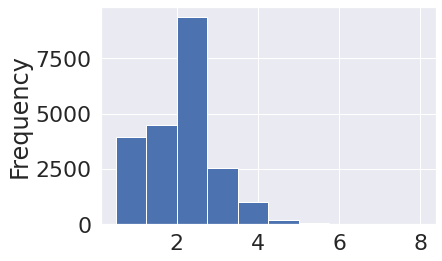

In [43]:
kc_house_data['bathrooms'].plot(kind='hist');

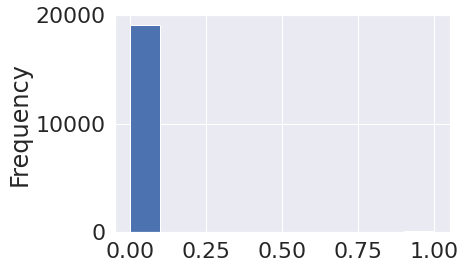

In [44]:
kc_house_data['waterfront'].plot(kind='hist');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


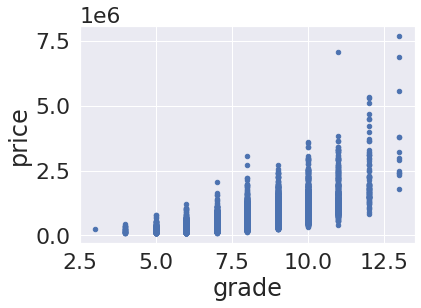

In [47]:
kc_house_data.plot(kind='scatter', x='grade', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


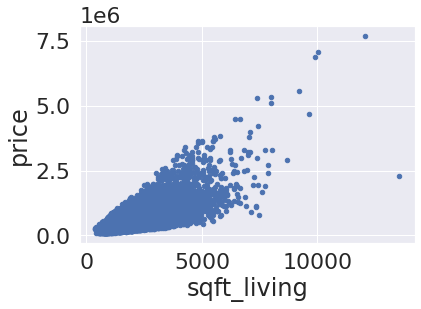

In [48]:
kc_house_data.plot(kind='scatter', x='sqft_living', y='price');

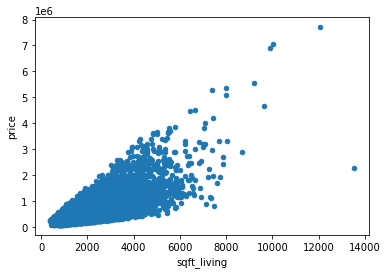

In [39]:
kc_house_data.plot.scatter(x='sqft_living', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


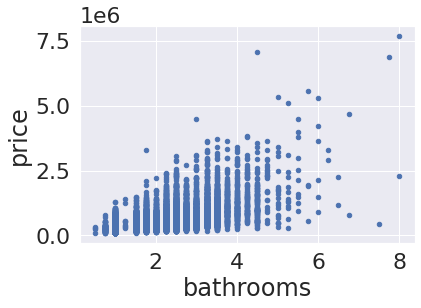

In [49]:
kc_house_data.plot(kind='scatter', x='bathrooms', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


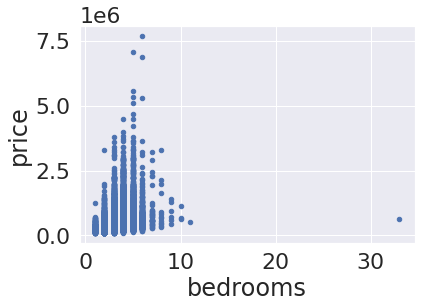

In [50]:
kc_house_data.plot(kind='scatter', x='bedrooms', y='price');

TypeError: could not convert string to float: 'NO'

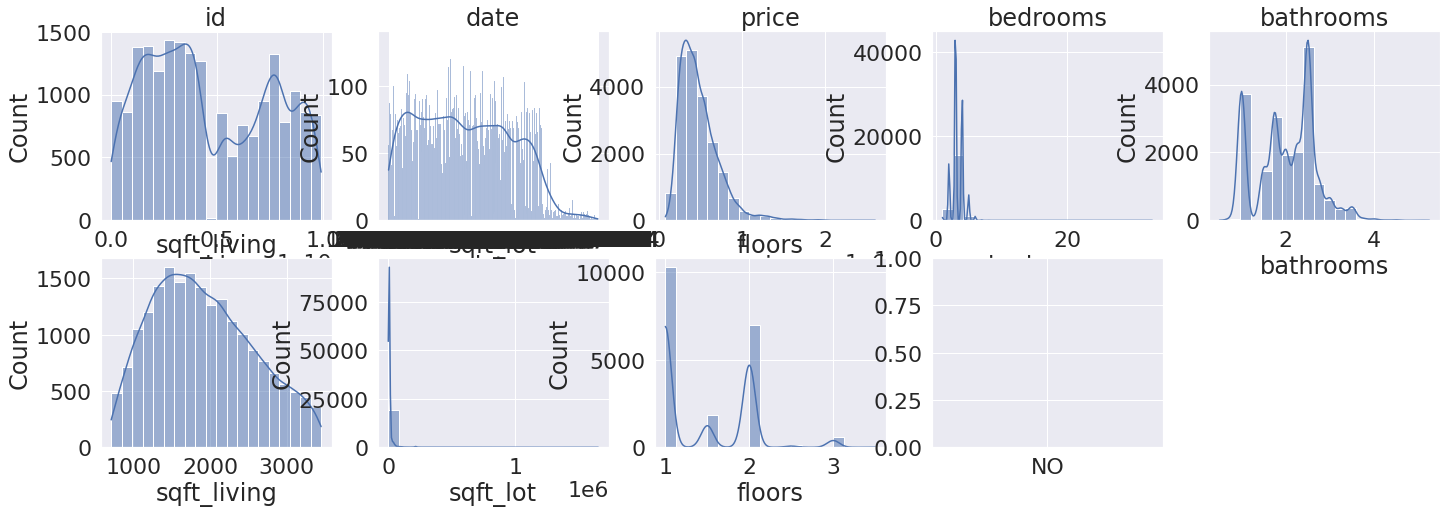

In [51]:
plt.figure(figsize=(24, 16))
for feature in kc_house_data.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [38]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Modelling

We create a simple linear regression baseline model using two variables, **price**(target) and **square footage of the living space** in a home.

In [41]:
# define features and target
features = ['sqft_living']
target = ['price']

# separate dataframe into feature matrix x and target vector y
X = kc_house_data[features]
y = kc_house_data[target]

In [43]:
# Fit to the model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [45]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:59:49   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### Model Remarks

The model and coefficients are statistically significant with all p-values well below the standard alpha of *0.05*

The R-squared value is about **0.493**  i.e 49% of the variance in the target variable *price* can be explained by square foot living.

The intercept is about -4.399e+04 meaning that if we put 0 for square foot living we would expect the price to decrease by 43990

The square foot living coefficient is about **280.8630** Meaning that for each additional *1000* put on square foot living, the price would increase by **280,863**

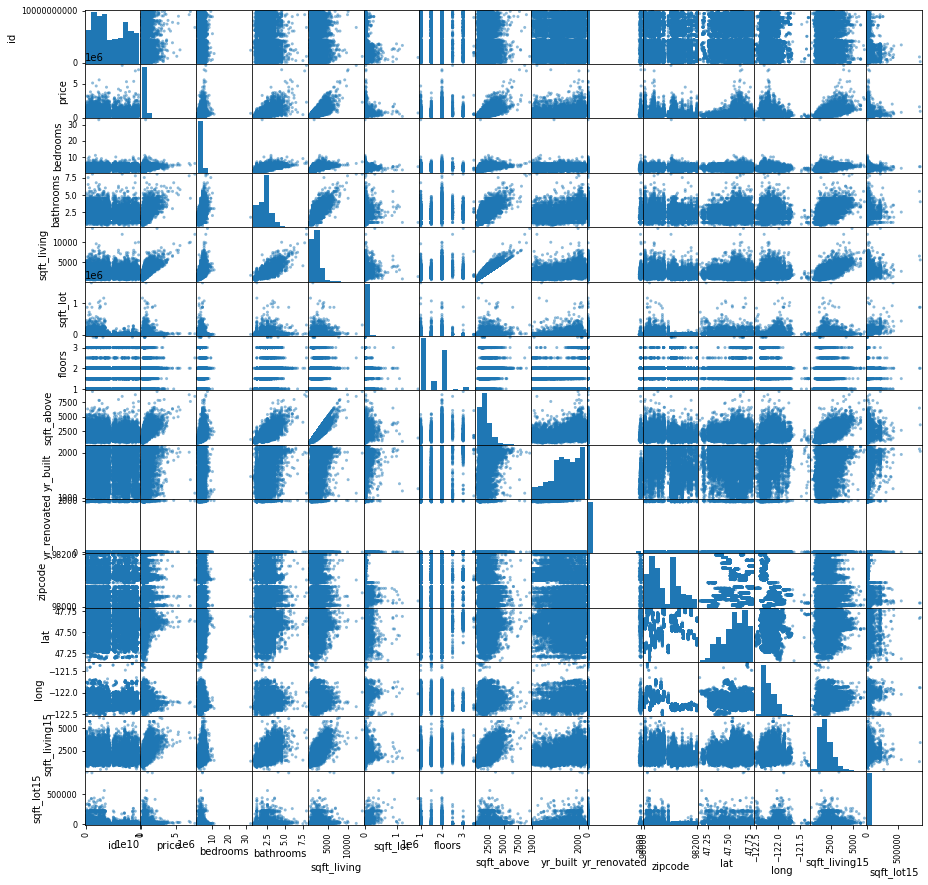

In [46]:
pd.plotting.scatter_matrix(kc_house_data, figsize=[15, 15]);
plt.show()

### Multiple Linear Regression

- Use more than 2 independent variables.
- One-hot encode categorical variables
- Check for multicollinearity

In [52]:
# Fill null values in the waterfront column with the mode of the column data
mode_value = kc_house_data['waterfront'].mode()[0]
kc_house_data['waterfront'].fillna(mode_value, inplace=True)
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [53]:
kc_house_data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [66]:
# 
y = kc_house_data['price']
X = kc_house_data[['waterfront', 'grade', 'condition']]
X

,waterfront,grade,condition
0,NO,7 Average,Average
1,NO,7 Average,Average
2,NO,6 Low Average,Average
3,NO,7 Average,Very Good
4,NO,8 Good,Average
...,...,...,...
21592,NO,8 Good,Average
21593,NO,8 Good,Average
21594,NO,7 Average,Average
21595,NO,8 Good,Average


In [67]:
X = pd.get_dummies(X, drop_first=True)
X

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [56]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1934.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:28:22   Log-Likelihood:            -2.9819e+05
No. Observations:               21597   AIC:                         5.964e+05
Df Residuals:                   21581   BIC:                         5.965e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.035e+06   7

In [69]:
X.columns

Index(['waterfront_YES', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good'],
      dtype='object')

In [70]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), fig=fig)
plt.tight_layout()
plt.show();

ValueError: 'waterfront_YES' is not in list

<Figure size 1080x720 with 0 Axes>

#### Model remarks

In this case, R-squared is 0.573, indicating that the model explains 57.3% of the variance in the price.

The adjusted R-squared, 0.573 in this case, suggests that the inclusion of the predictors (waterfront, grade and condition) has improved the model fit.

The high F-statistic (1934) and associated low p-value (0.00) suggest that the overall model is statistically significant.

In terms of coefficients, For example, the coefficient for "waterfront_YES" is 8.464e+05, indicating the expected change in the dependent variable for a one-unit increase in this predictor, holding other variables constant.

For the t-stastistic, larger absolute values indicate more significant predictors. In this case, 

In [57]:
y = kc_house_data['price']
X = kc_house_data[['sqft_living', 'bathrooms', 'bedrooms']]
X

,sqft_living,bathrooms,bedrooms
0,1180,1.00,3
1,2570,2.25,3
2,770,1.00,2
3,1960,3.00,4
4,1680,2.00,3
...,...,...,...
21592,1530,2.50,3
21593,2310,2.50,4
21594,1020,0.75,2
21595,1600,2.50,3


In [58]:
model = sm.OLS(y, sm.add_constant(X))
results= model.fit()

In [59]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:35:03   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      

#### Model Remarks

The model and coefficients are statistically significant with all p-values well below the standard alpha of *0.05*

The Adjusted R-squared value is about **0.507**  i.e 50.7% of the variance in the target variable *price* can be explained by square foot living, bathrooms and bedrooms.

The intercept is about 7.639e+04 meaning that if we put 0 for square foot living, bathroom and bedrooms we would expect the price to increase by 76390

The coefficient for sqft_living is 310.1848. This implies that, holding other variables constant, for every one-unit increase in square footage of living space (sqft_living), the estimated price (price) is expected to increase by 310.1848 units.

The coefficient for bathrooms is 7659.0953. This suggests that, holding other variables constant, for every additional bathroom (bathrooms), the estimated price (price) is expected to increase by 7659.0953 units. The p-value indicates that this variable is statistically significant at a 0.05 significance level

The coefficient for bedrooms is -5.857e+04. This implies that, holding other variables constant, for every additional bedroom (bedrooms), the estimated price (price) is expected to decrease by 5.857e+04 units. The negative sign indicates a negative relationship. The p-value is very low, suggesting that this variable is statistically significant

The model explains approximately 50.7% of the variance in house prices.
sqft_living has a strong positive relationship with price.
bathrooms has a positive relationship with price but is less significant.
bedrooms has a negative relationship with price and is statistically significant.



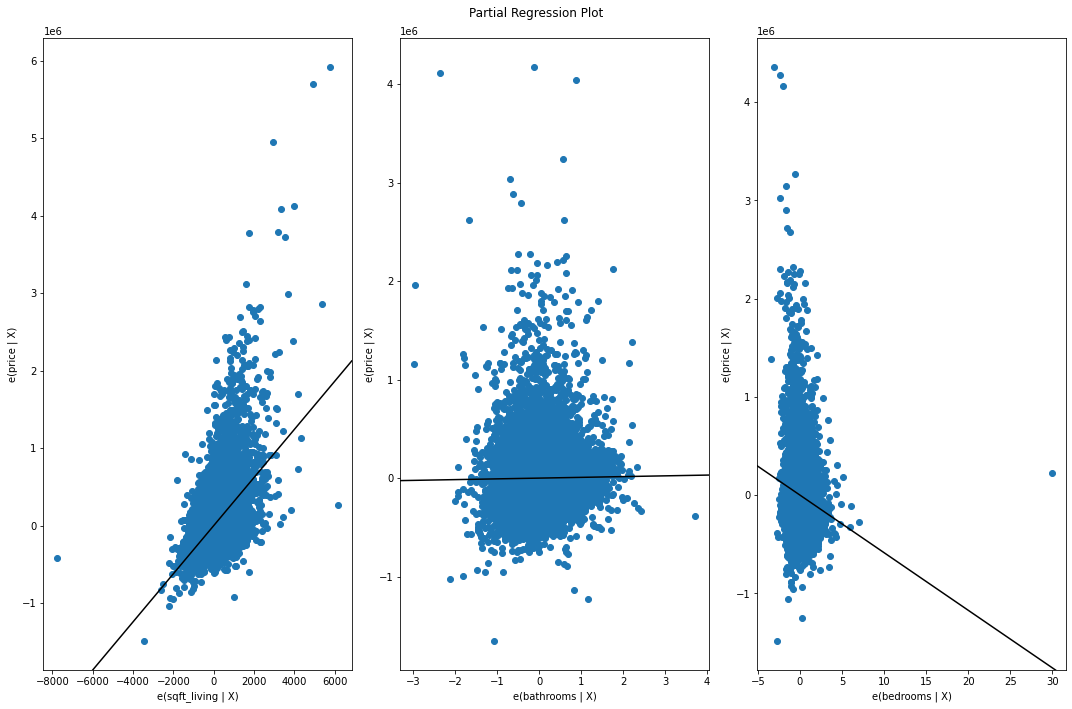

In [63]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), grid=(1,3), fig=fig)
plt.tight_layout()
plt.show();

In [78]:
formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated'
#Included everything about the house, not the date or the neighborhood.
model = ols(formula=formula, data=kc_house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     134.5
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:56:16   Log-Likelihood:            -2.3614e+05
No. Observations:               17340   AIC:                         4.729e+05
Df Residuals:                   17030   BIC:                         4.753e+05
Df Model:                         309                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.717e+06   1.51e+05     44.481      0.000    6.42e+06    7.01e+06
waterfront[T.YES]        4.366e+05   2.41e+04     18.089      0.000    3.89e+05    4.84e+05
view[T.EXCELLENT]        2.305e+05   1.78e+04     12.970      0.000    1.96e+05    2.65e+05
view[T.FAIR]             6.048e+04   1.44e+04      4.195      0.000    3.22e+04    8.87e+04
view[T.GOOD]             5.994e+04   1.28e+04      4.670      0.000    3.48e+04    8.51e+04
view[T.NONE]            -6.128e+04   7753.859     -7.903      0.000   -7.65e+04   -4.61e+04
condition[T.Fair]       -3.122e+04   1.74e+04     -1.791      0.073   -6.54e+04    2941.913
condition[T.Good]        1.679e+04   3877.674      4.330      0.000    9188.087    2.44e+04
condition[T.Poor]       -1.433e+04   4.32e+04     -0.332      0.740    -9.9e+04    7.03e+04
condition[T.Very Good]   5.867e+04   6231.377      9.414      0.000    4.65e+04    7.09e+04
grade[T.11 Excellent]    2.478e+05   1.37e+04     18.123      0.000    2.21e+05    2.75e+05
grade[T.12 Luxury]       7.675e+05   2.72e+04     28.181      0.000    7.14e+05    8.21e+05
grade[T.13 Mansion]      1.534e+06   7.06e+04     21.722      0.000     1.4e+06    1.67e+06
grade[T.3 Poor]         -5.594e+05   2.01e+05     -2.785      0.005   -9.53e+05   -1.66e+05
grade[T.4 Low]          -5.232e+05   4.88e+04    -10.731      0.000   -6.19e+05   -4.28e+05
grade[T.5 Fair]         -5.447e+05   1.82e+04    -29.850      0.000   -5.81e+05   -5.09e+05
grade[T.6 Low Average]  -4.952e+05   1.12e+04    -44.139      0.000   -5.17e+05   -4.73e+05
grade[T.7 Average]      -4.183e+05   9294.764    -45.007      0.000   -4.37e+05      -4e+05
grade[T.8 Good]         -3.313e+05   8489.201    -39.030      0.000   -3.48e+05   -3.15e+05
grade[T.9 Better]       -1.855e+05   8347.223    -22.224      0.000   -2.02e+05   -1.69e+05
sqft_basement[T.10.0]   -5.653e+04   1.42e+05     -0.399      0.690   -3.35e+05    2.22e+05
sqft_basement[T.100.0]   7.707e+04   3.31e+04      2.328      0.020    1.22e+04    1.42e+05
sqft_basement[T.1000.0] -4.166e+04   1.96e+04     -2.123      0.034   -8.01e+04   -3197.316
sqft_basement[T.1008.0] -1.417e+05      2e+05     -0.708      0.479   -5.34e+05    2.51e+05
sqft_basement[T.1010.0] -4.815e+04   2.86e+04     -1.681      0.093   -1.04e+05    7992.499
sqft_basement[T.1020.0]  7.225e+04   3.17e+04      2.280      0.023    1.01e+04    1.34e+05
sqft_basement[T.1024.0] -8.246e+05   2.01e+05     -4.111      0.000   -1.22e+06   -4.31e+05
sqft_basement[T.1030.0]  5.258e+04   3.61e+04      1.456      0.145   -1.82e+04    1.23e+05
sqft_basement[T.1040.0] -4.561e+04   3.04e+04     -1.503      0.133   -1.05e+05    1.39e+04
sqft_basement[T.1050.0] -9597.8872   3.41e+04     -0.281      0.779   -7.65e+04    5.73e+04
sqft_basement[T.1060.0] -6.679e+04   3.01e+04  

In [79]:
# bathroom, bedroom, grade
y = kc_house_data['price']
X = kc_house_data[['bedrooms', 'grade', 'bathrooms']]
X

,bedrooms,grade,bathrooms
0,3,7 Average,1.00
1,3,7 Average,2.25
2,2,6 Low Average,1.00
3,4,7 Average,3.00
4,3,8 Good,2.00
...,...,...,...
21592,3,8 Good,2.50
21593,4,8 Good,2.50
21594,2,7 Average,0.75
21595,3,8 Good,2.50


In [80]:
X = pd.get_dummies(X, columns=['grade'], drop_first=True, dtype=int)
X

,bedrooms,bathrooms,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,0,0,0,0,0,0,0,1,0,0
1,3,2.25,0,0,0,0,0,0,0,1,0,0
2,2,1.00,0,0,0,0,0,0,1,0,0,0
3,4,3.00,0,0,0,0,0,0,0,1,0,0
4,3,2.00,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,0,0,0,0,0,0,0,0,1,0
21593,4,2.50,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,0,0,0,0,0,0,0,1,0,0
21595,3,2.50,0,0,0,0,0,0,0,0,1,0


In [81]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2085.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:58:00   Log-Likelihood:            -2.9908e+05
No. Observations:               21597   AIC:                         5.982e+05
Df Residuals:                   21584   BIC:                         5.983e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  7.9e+05   1